In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table
from skimage import data, filters, measure, morphology


import plotly
import plotly.express as px
import plotly.graph_objects as go

# Ejemplo para obtener propiedades de cada elemento

C:\Users\mrgamarra\AppData\Local\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


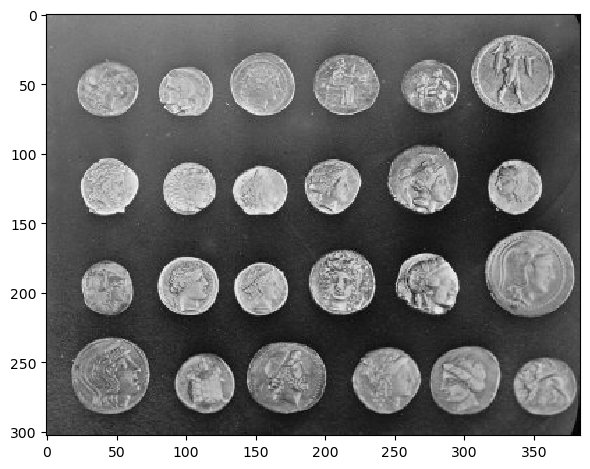

In [2]:
img = data.coins()
imshow(img)

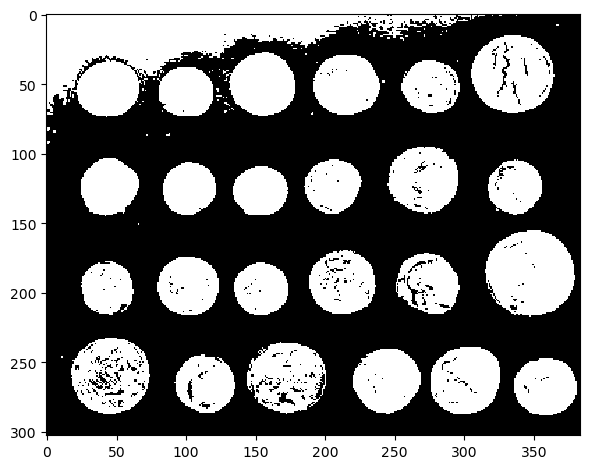

In [57]:
##umbralización y operaciones morfológicas
from skimage.morphology import disk, square
threshold = filters.threshold_otsu(img)
mask = img > threshold
imshow(mask)

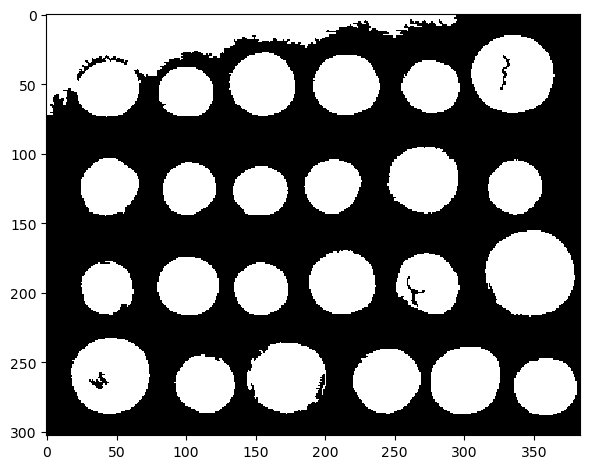

In [59]:
mask = morphology.remove_small_objects(mask, 50)
#mask = opening(mask, disk(1))
mask = morphology.remove_small_holes(mask, 50)

imshow(mask)

# Visualización de propiedades en una tabla 

In [60]:
labels = measure.label(mask)

props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

pd.DataFrame(regionprops_table(labels, img, properties=properties))

,area,eccentricity,perimeter,intensity_mean
0,8897,0.976567,1046.133080,126.686636
1,2556,0.331874,257.764502,158.295775
2,1684,0.295118,154.160426,168.416865
3,1639,0.388589,150.124892,157.239780
4,1232,0.409037,132.225397,154.126623
5,1134,0.423909,125.154329,182.728395
6,1895,0.348092,172.195959,159.493931
7,1325,0.341981,137.882251,189.298113
8,1218,0.376314,129.296465,171.528736
9,1173,0.234857,126.710678,170.238704



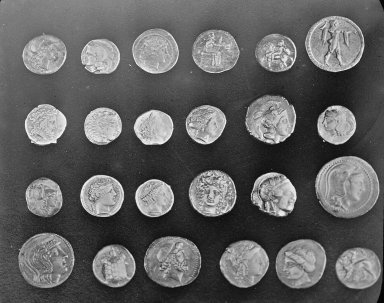

In [61]:
##Crear la imagen con las etiquetas superpuestas
fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip')  # hover is only for label info

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            name=label_i,
            mode='lines',
            fill='toself',
            showlegend=False,
            hovertemplate=hoverinfo,
            hoveron='points+fills',
        )
    )

plotly.io.show(fig)